<a href="https://colab.research.google.com/github/Lorybs/PES_ciencia_de_dados/blob/main/ProjetoPES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Instalando os primeiros principais pacotes

In [ ]:
!pip install pandas
!pip install scipy
!pip install matplotlib
!pip install kaggle
!pip install fancyimpute

In [2]:
#importanto alguns pacotes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


#2 Importanto os dados do Kaggle

In [ ]:
from google.colab import files
files.upload() #enviar o arquivo kaggle.json

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#importando base com índices de fertilidade
!kaggle datasets download -d omarsobhy14/fertility-rate-per-country

In [ ]:
#importando dados dos países com média de tempo de escolaridade
!kaggle datasets download -d fredericksalazar/average-years-of-schooling-since-1870-2017

In [ ]:
#importando base de renda percapta dos países
!kaggle datasets download -d zgrcemta/world-gdpgdp-gdp-per-capita-and-annual-growths

In [ ]:
#importando base de país por região
!kaggle datasets download -d andradaolteanu/country-mapping-iso-continent-region

In [ ]:
!unzip \*.zip  && rm *.zip

In [ ]:
#Carregando os arquivos CSV

In [11]:
fertilidade = pd.read_csv("API_SP.DYN.TFRT.IN_DS2_en_csv_v2_5455118.csv")

In [12]:
escolaridade = pd.read_csv("mean-years-of-schooling-long-run.csv", sep=";")

In [13]:
percapta = pd.read_csv("gdp_per_capita.csv")

In [14]:
regiao = pd.read_csv("continents2.csv")

# 3 Inspecionando os dados


In [15]:
fertilidade.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,3.625000,3.417000,...,2.117000,2.148000,1.972000,1.953000,1.839000,1.587000,1.486000,1.325000,1.180000,NaN
1,Africa Eastern and Southern,AFE,6.724125,6.742752,6.762930,6.778712,6.788420,6.800322,6.810571,6.818612,...,4.808821,4.739863,4.677619,4.615671,4.570410,4.527707,4.482899,4.416902,4.354710,NaN
2,Afghanistan,AFG,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,7.320000,7.339000,...,5.696000,5.560000,5.405000,5.262000,5.129000,5.002000,4.870000,4.750000,4.643000,NaN
3,Africa Western and Central,AFW,6.458448,6.471518,6.491826,6.506088,6.525355,6.541102,6.564967,6.589806,...,5.506350,5.437493,5.385059,5.328709,5.255345,5.186319,5.118932,5.049329,4.978662,NaN
4,Angola,AGO,6.708000,6.790000,6.872000,6.954000,7.036000,7.116000,7.194000,7.267000,...,5.953000,5.864000,5.774000,5.686000,5.600000,5.519000,5.442000,5.371000,5.304000,NaN


In [16]:
escolaridade.head()

,Entity,Code,Year,avg_years_of_schooling
0,Afghanistan,AFG,1870,0.01
1,Afghanistan,AFG,1875,0.01
2,Afghanistan,AFG,1880,0.01
3,Afghanistan,AFG,1885,0.01
4,Afghanistan,AFG,1890,0.01


In [17]:
percapta.head()

,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,147.612227,147.014904,156.189192,182.243917,162.347592,180.214908,190.845484,192.337167,...,1736.166560,1713.899299,1703.596298,1549.037940,1431.778723,1573.063386,1574.978648,1530.059177,1359.618224,NaN
2,Afghanistan,AFG,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,...,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN
3,Africa Western and Central,AFW,107.932233,113.081647,118.831107,123.442888,131.854402,138.526332,144.326212,128.582470,...,1965.118485,2157.481149,2212.853135,1894.310195,1673.835527,1613.473553,1704.139603,1777.918672,1710.073363,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1776.166868,NaN


In [18]:
regiao.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


#4 Análise Exporatória e pré processamento


In [19]:
fertilidade.shape

(266, 65)

In [20]:
fertilidade.isnull().sum()

Country Name      0
Country Code      0
1960             13
1961             14
1962             13
               ... 
2018              8
2019              8
2020              7
2021              8
2022            266
Length: 65, dtype: int64

In [21]:
#ajustando o nome da coluna de sigla do país na tabela fertilidade
fertilidade.rename(columns={'Country Code':'Code'},inplace=True)
fertilidade.rename(columns={'Country Name':'Country'},inplace=True)

In [22]:
#transformando o ano da tabela de fertilidade em variável, ajustando para o formato final do dataset
fertilidade = pd.melt(frame = fertilidade,id_vars=['Country','Code'], var_name = 'Year',value_name='indice_fertilidade')

In [23]:
fertilidade.head()

,Country,Code,Year,indice_fertilidade
0,Aruba,ABW,1960,4.820000
1,Africa Eastern and Southern,AFE,1960,6.724125
2,Afghanistan,AFG,1960,7.282000
3,Africa Western and Central,AFW,1960,6.458448
4,Angola,AGO,1960,6.708000


In [24]:
fertilidade.isnull().sum()

Country                 0
Code                    0
Year                    0
indice_fertilidade    879
dtype: int64

In [25]:
fertilidade['Year'] = fertilidade['Year'].astype('int')

In [26]:
#eliminando colunas com valores anteriores a 1960 e posteriores a 2020
fertilidade = fertilidade.drop(fertilidade[(fertilidade['Year'] < 1960) | (fertilidade['Year'] > 2020)].index)

In [28]:
#ordenando por código do país e ano
fertilidade = fertilidade.sort_values(['Code' , 'Year'], ascending=True , ignore_index=True)

In [29]:
fertilidade.head()

,Country,Code,Year,indice_fertilidade
0,Aruba,ABW,1960,4.820
1,Aruba,ABW,1961,4.655
2,Aruba,ABW,1962,4.471
3,Aruba,ABW,1963,4.271
4,Aruba,ABW,1964,4.059


In [27]:
fertilidade.isnull().sum()

Country                 0
Code                    0
Year                    0
indice_fertilidade    605
dtype: int64

In [30]:
print(fertilidade['indice_fertilidade'].mean())
print(fertilidade['indice_fertilidade'].median())

3.943237619976506
3.51


In [33]:
#preenchendo os dados nulos de fertilidade com base nos valores anteriores e posteriores
fertilidade = fertilidade.fillna(axis=0, method='ffill', limit=5)
fertilidade = fertilidade.fillna(axis=0, method='bfill', limit=5)

In [34]:
fertilidade.isnull().sum()

Country                 0
Code                    0
Year                    0
indice_fertilidade    343
dtype: int64

In [35]:
print(fertilidade['indice_fertilidade'].mean())
print(fertilidade['indice_fertilidade'].median())

3.925048719600075
3.482


In [36]:
import pandas as pd
from fancyimpute import KNN

In [37]:
#usando o knn para preencher o restante dos dados ausentes
def preencher_ausentes_knn(fertilidade, indice_fertilidade):
    coluna_array = fertilidade[indice_fertilidade].values
    knn_imputer = KNN(k=5)
    coluna_array_filled = knn_imputer.fit_transform(coluna_array.reshape(-1, 1))
    fertilidade[indice_fertilidade] = coluna_array_filled.flatten()

    return fertilidade

In [ ]:
fertilidade = preencher_ausentes_knn(fertilidade, 'indice_fertilidade')

In [40]:
print(fertilidade['indice_fertilidade'].mean())
print(fertilidade['indice_fertilidade'].median())

3.842077456761247
3.3884999999999996


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
fertilidade.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Country               0
Code                  0
Year                  0
indice_fertilidade    0
dtype: int64

In [ ]:
# com o preenchimento dos campos vazios utilizando os recursos acima, foi possível preencher todo dataset sem grandes alterações nas médias e medianas

In [42]:
fertilidade.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Country,Code,Year,indice_fertilidade
0,Aruba,ABW,1960,4.820
1,Aruba,ABW,1961,4.655
2,Aruba,ABW,1962,4.471
3,Aruba,ABW,1963,4.271
4,Aruba,ABW,1964,4.059


In [ ]:
!pip install --upgrade ipykernel
#pip install ipython==7.10.0
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
#criando uma variável chave primária para fazer o merge com as outras bases
fertilidade['nova_chave'] = fertilidade['Code'].astype(str) + '_' + fertilidade['Year'].astype(str)

In [ ]:
fertilidade = fertilidade[['nova_chave', 'Country', 'Code', 'Year', 'indice_fertilidade']]

In [48]:
fertilidade.head()

,nova_chave,Country,Code,Year,indice_fertilidade
0,ABW_1960,Aruba,ABW,1960,4.820
1,ABW_1961,Aruba,ABW,1961,4.655
2,ABW_1962,Aruba,ABW,1962,4.471
3,ABW_1963,Aruba,ABW,1963,4.271
4,ABW_1964,Aruba,ABW,1964,4.059


In [49]:
#criando uma variável chave primária do tipo string para fazer o merge com as outras bases
escolaridade['nova_chave'] = escolaridade['Code'].astype(str) + '_' + escolaridade['Year'].astype(str)

In [50]:
#simplificando nome da coluna escolaridade
escolaridade.rename(columns={'avg_years_of_schooling':'Avg_Years_at_Shool'},inplace=True)
escolaridade.rename(columns={'Entity':'Country'},inplace=True)

In [51]:
escolaridade.columns.values

array(['Country', 'Code', 'Year', 'Avg_Years_at_Shool', 'nova_chave'],
      dtype=object)

In [52]:
escolaridade = escolaridade[['nova_chave', 'Country', 'Code', 'Year', 'Avg_Years_at_Shool']]

In [53]:
escolaridade.sort_values(by='Avg_Years_at_Shool', ascending=True)

,nova_chave,Country,Code,Year,Avg_Years_at_Shool
7628,YEM_1975,Yemen,YEM,1975,0.00
6886,THA_1870,Thailand,THA,1870,0.00
7617,YEM_1920,Yemen,YEM,1920,0.01
7618,YEM_1925,Yemen,YEM,1925,0.01
7619,YEM_1930,Yemen,YEM,1930,0.01
...,...,...,...,...,...
2606,DEU_2014,Germany,DEU,2014,14.00
2605,DEU_2013,Germany,DEU,2013,14.00
2609,DEU_2017,Germany,DEU,2017,14.10
2607,DEU_2015,Germany,DEU,2015,14.10


In [54]:
escolaridade.isnull().sum()

nova_chave            0
Country               0
Code                  0
Year                  0
Avg_Years_at_Shool    0
dtype: int64

In [55]:
#ajustando nome da coluna da sigla do país
regiao.rename(columns={'alpha-3':'Code'},inplace=True)

In [56]:
regiao.head()

,name,alpha-2,Code,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [57]:
#selecionando apenas colunas necesssarias para o novo dataset
regiao.columns.values

array(['name', 'alpha-2', 'Code', 'country-code', 'iso_3166-2', 'region',
       'sub-region', 'intermediate-region', 'region-code',
       'sub-region-code', 'intermediate-region-code'], dtype=object)

In [58]:
regiaoselecionadas = ['Code' , 'region']

In [59]:
regiao2 = regiao.filter(items=regiaoselecionadas)

In [60]:
regiao2.head()

,Code,region
0,AFG,Asia
1,ALA,Europe
2,ALB,Europe
3,DZA,Africa
4,ASM,Oceania


In [61]:
regiao2.shape

(249, 2)

In [62]:
regiao2.isnull().sum()

Code      0
region    1
dtype: int64

In [63]:
#limpando dados vazios da regiao
regiao2.dropna(inplace= True)

In [64]:
regiao2.isnull().sum()

Code      0
region    0
dtype: int64

In [65]:
percapta.head()

,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,147.612227,147.014904,156.189192,182.243917,162.347592,180.214908,190.845484,192.337167,...,1736.166560,1713.899299,1703.596298,1549.037940,1431.778723,1573.063386,1574.978648,1530.059177,1359.618224,NaN
2,Afghanistan,AFG,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,...,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN
3,Africa Western and Central,AFW,107.932233,113.081647,118.831107,123.442888,131.854402,138.526332,144.326212,128.582470,...,1965.118485,2157.481149,2212.853135,1894.310195,1673.835527,1613.473553,1704.139603,1777.918672,1710.073363,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1776.166868,NaN


In [66]:
#transformando o ano em variável na tabela de renda percapta, ajustando para o formato final do dataset
percapta.rename(columns={'Country Name':'Country'},inplace=True)
percapta = pd.melt(frame = percapta,id_vars=['Country','Code'], var_name = 'Year',value_name='renda_percapta')

In [67]:
percapta.head()

,Country,Code,Year,renda_percapta
0,Aruba,ABW,1960,NaN
1,Africa Eastern and Southern,AFE,1960,147.612227
2,Afghanistan,AFG,1960,59.773234
3,Africa Western and Central,AFW,1960,107.932233
4,Angola,AGO,1960,NaN


In [68]:
#iniciando a limpeza de dados ausentes da base de percapta
percapta['Year'].replace("Unnamed: 65",np.nan,inplace=True)

In [69]:
percapta.shape

(16492, 4)

In [70]:
percapta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16492 entries, 0 to 16491
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         16492 non-null  object 
 1   Code            16492 non-null  object 
 2   Year            16226 non-null  object 
 3   renda_percapta  12837 non-null  float64
dtypes: float64(1), object(3)
memory usage: 515.5+ KB


In [71]:
percapta.isnull().sum()

Country              0
Code                 0
Year               266
renda_percapta    3655
dtype: int64

In [76]:
#eliminando os dados cujo a coluna de Ano está vazio
percapta.dropna(subset=['Year'], inplace=True)

In [77]:
percapta.isnull().sum()

Country              0
Code                 0
Year                 0
renda_percapta    3389
dtype: int64

In [79]:
print(percapta['renda_percapta'].mean())
print(percapta['renda_percapta'].median())

7964.501931186703
1810.61923013403


In [82]:
percapta = percapta.fillna(axis=0, method='ffill', limit=5)
percapta = percapta.fillna(axis=0, method='bfill', limit=5)

In [83]:
print(percapta['renda_percapta'].mean())
print(percapta['renda_percapta'].median())

7178.585542174074
1536.2808898839498


In [84]:
percapta.isnull().sum()

Country           0
Code              0
Year              0
renda_percapta    0
dtype: int64

In [85]:
percapta.shape

(16226, 4)

In [86]:
#criando uma variável chave primária do tipo string para fazer o merge com as outras bases
percapta['nova_chave'] = percapta['Code'].astype(str) + '_' + percapta['Year'].astype(str)

In [87]:
percapta = percapta[['nova_chave', 'Country', 'Code', 'Year', 'renda_percapta']]

In [88]:
percapta.head()

,nova_chave,Country,Code,Year,renda_percapta
0,ABW_1960,Aruba,ABW,1960,147.612227
1,AFE_1960,Africa Eastern and Southern,AFE,1960,147.612227
2,AFG_1960,Afghanistan,AFG,1960,59.773234
3,AFW_1960,Africa Western and Central,AFW,1960,107.932233
4,AGO_1960,Angola,AGO,1960,107.932233


In [89]:
#selecionando apenas colunas necesssarias para o novodataset
percapta.columns.values

array(['nova_chave', 'Country', 'Code', 'Year', 'renda_percapta'],
      dtype=object)

In [90]:
percaptaselecionadas = ['nova_chave' , 'renda_percapta']

In [91]:
percapta2 = percapta.filter(items=percaptaselecionadas)

In [92]:
percapta2.sort_values(by='renda_percapta', ascending=True)

,nova_chave,renda_percapta
1756,MMR_1966,12.802812
2022,MMR_1967,12.915456
1490,MMR_1965,16.596459
1229,MOZ_1964,20.035487
1224,MMR_1964,20.035487
...,...,...
15565,LIE_2018,180366.715198
12917,MCO_2008,185785.725925
15577,MCO_2018,185978.609251
14513,MCO_2014,189432.370013


In [93]:
#montando um novo dataset com apenas os dados necessários para análise, comecando com fertilidade e escolaridade
novodataset1 = pd.merge(fertilidade, escolaridade, left_on = ['nova_chave', 'Country', 'Code', 'Year'], how='inner',
                        right_on=['nova_chave' , 'Country' , 'Code' , 'Year'] , validate = 'm:m')

In [94]:
display(novodataset1)

,nova_chave,Country,Code,Year,indice_fertilidade,Avg_Years_at_Shool
0,AFG_1960,Afghanistan,AFG,1960,7.282,0.22
1,AFG_1965,Afghanistan,AFG,1965,7.305,0.29
2,AFG_1970,Afghanistan,AFG,1970,7.400,0.35
3,AFG_1975,Afghanistan,AFG,1975,7.542,0.62
4,AFG_1980,Afghanistan,AFG,1980,7.588,0.78
...,...,...,...,...,...,...
4990,ZWE_2013,Zimbabwe,ZWE,2013,4.064,8.00
4991,ZWE_2014,Zimbabwe,ZWE,2014,3.962,8.20
4992,ZWE_2015,Zimbabwe,ZWE,2015,3.849,8.20
4993,ZWE_2016,Zimbabwe,ZWE,2016,3.771,8.20


In [95]:
#agregando a coluna de renda percapata
novodataset2 = pd.merge(novodataset1,percapta2, how='left', left_on=['nova_chave'], right_on=['nova_chave'])

In [96]:
display(novodataset2)

,nova_chave,Country,Code,Year,indice_fertilidade,Avg_Years_at_Shool,renda_percapta
0,AFG_1960,Afghanistan,AFG,1960,7.282,0.22,59.773234
1,AFG_1965,Afghanistan,AFG,1965,7.305,0.29,101.108325
2,AFG_1970,Afghanistan,AFG,1970,7.400,0.35,156.518771
3,AFG_1975,Afghanistan,AFG,1975,7.542,0.62,186.510838
4,AFG_1980,Afghanistan,AFG,1980,7.588,0.78,272.655510
...,...,...,...,...,...,...,...
4990,ZWE_2013,Zimbabwe,ZWE,2013,4.064,8.00,1429.998461
4991,ZWE_2014,Zimbabwe,ZWE,2014,3.962,8.20,1434.896277
4992,ZWE_2015,Zimbabwe,ZWE,2015,3.849,8.20,1445.069702
4993,ZWE_2016,Zimbabwe,ZWE,2016,3.771,8.20,1464.588957


In [97]:
#incluindo a regiao de outro dataset
novodataset3 = pd.merge(novodataset2,regiao2, how='left', left_on=['Code'], right_on=['Code'])
display(novodataset3)

,nova_chave,Country,Code,Year,indice_fertilidade,Avg_Years_at_Shool,renda_percapta,region
0,AFG_1960,Afghanistan,AFG,1960,7.282,0.22,59.773234,Asia
1,AFG_1965,Afghanistan,AFG,1965,7.305,0.29,101.108325,Asia
2,AFG_1970,Afghanistan,AFG,1970,7.400,0.35,156.518771,Asia
3,AFG_1975,Afghanistan,AFG,1975,7.542,0.62,186.510838,Asia
4,AFG_1980,Afghanistan,AFG,1980,7.588,0.78,272.655510,Asia
...,...,...,...,...,...,...,...,...
4990,ZWE_2013,Zimbabwe,ZWE,2013,4.064,8.00,1429.998461,Africa
4991,ZWE_2014,Zimbabwe,ZWE,2014,3.962,8.20,1434.896277,Africa
4992,ZWE_2015,Zimbabwe,ZWE,2015,3.849,8.20,1445.069702,Africa
4993,ZWE_2016,Zimbabwe,ZWE,2016,3.771,8.20,1464.588957,Africa


In [98]:
novodataset3.columns.values

array(['nova_chave', 'Country', 'Code', 'Year', 'indice_fertilidade',
       'Avg_Years_at_Shool', 'renda_percapta', 'region'], dtype=object)

In [99]:
#montando um dataset final com as colunas o ordem desejada
selecionadas = ['nova_chave', 'Country', 'Code', 'Year', 'region', 'indice_fertilidade', 'Avg_Years_at_Shool', 'renda_percapta']

In [100]:
datasetfinal = novodataset3.filter(items=selecionadas)

In [101]:
datasetfinal.head()

,nova_chave,Country,Code,Year,region,indice_fertilidade,Avg_Years_at_Shool,renda_percapta
0,AFG_1960,Afghanistan,AFG,1960,Asia,7.282,0.22,59.773234
1,AFG_1965,Afghanistan,AFG,1965,Asia,7.305,0.29,101.108325
2,AFG_1970,Afghanistan,AFG,1970,Asia,7.400,0.35,156.518771
3,AFG_1975,Afghanistan,AFG,1975,Asia,7.542,0.62,186.510838
4,AFG_1980,Afghanistan,AFG,1980,Asia,7.588,0.78,272.655510


In [103]:
#ALterando os tipos das variáveis, conforme a necessidade
datasetfinal['Country'] = datasetfinal['Country'].astype('category')
datasetfinal['Code'] = datasetfinal['Code'].astype('category')
datasetfinal['region'] = datasetfinal['region'].astype('category')
datasetfinal['nova_chave'] = datasetfinal['nova_chave'].astype('category')
datasetfinal['Year'] = datasetfinal['Year'].astype('int')

In [104]:
datasetfinal.dtypes

nova_chave            category
Country               category
Code                  category
Year                     int64
region                category
indice_fertilidade     float64
Avg_Years_at_Shool     float64
renda_percapta         float64
dtype: object

#4 Normalização e discretização

In [106]:
# Análises descritivas antes da normalização
datasetfinal.describe()

,Year,indice_fertilidade,Avg_Years_at_Shool,renda_percapta
count,4995.000000,4995.000000,4995.000000,4995.000000
mean,1999.367768,3.363467,6.991389,9761.105168
std,13.964580,1.807903,3.342408,17214.711345
min,1960.000000,0.000000,0.080000,16.596459
25%,1993.000000,1.820250,4.200000,742.249760
50%,2002.000000,2.744000,7.200000,2631.822739
75%,2010.000000,4.782500,9.800000,10194.836658
max,2017.000000,8.231000,14.100000,178864.851914


In [110]:
datasetfinal.sort_values(by='renda_percapta', ascending=True)

,nova_chave,Country,Code,Year,region,indice_fertilidade,Avg_Years_at_Shool,renda_percapta
3048,MMR_1965,Myanmar,MMR,1965,Asia,5.994,1.08,16.596459
3049,MMR_1970,Myanmar,MMR,1970,Asia,5.752,1.12,21.232583
2137,IRQ_1991,Iraq,IRQ,1991,Asia,5.810,3.40,22.795345
3051,MMR_1980,Myanmar,MMR,1980,Asia,4.828,1.68,29.528620
2138,IRQ_1992,Iraq,IRQ,1992,Asia,5.720,3.60,30.086387
...,...,...,...,...,...,...,...,...
2628,LIE_2016,Liechtenstein,LIE,2016,Europe,1.610,12.50,165642.386276
2627,LIE_2015,Liechtenstein,LIE,2015,Europe,1.400,12.40,167313.266280
2629,LIE_2017,Liechtenstein,LIE,2017,Europe,1.440,12.50,171253.964254
2625,LIE_2013,Liechtenstein,LIE,2013,Europe,1.450,12.40,173030.208279


In [113]:
# A renda percapta tem uma grande variação, mas é explicável, pois trata-se de renda entre os países. A discrepância é normal
dist = np.linalg.norm(datasetfinal.values[1,7]-datasetfinal.values[2626,7])
print(dist)

178763.74358862126


In [114]:
datasetfinal.columns.values

array(['nova_chave', 'Country', 'Code', 'Year', 'region',
       'indice_fertilidade', 'Avg_Years_at_Shool', 'renda_percapta'],
      dtype=object)

In [115]:
#criando um novo dataset para preservar os dados antigos e comecar novas análises
selecionadas2 = ['Country', 'Code', 'Year', 'region',
       'indice_fertilidade', 'Avg_Years_at_Shool', 'renda_percapta']

In [120]:
datasetcode = datasetfinal.filter(items=selecionadas2)
datasetcode.head()

,Country,Code,Year,region,indice_fertilidade,Avg_Years_at_Shool,renda_percapta
0,Afghanistan,AFG,1960,Asia,7.282,0.22,59.773234
1,Afghanistan,AFG,1965,Asia,7.305,0.29,101.108325
2,Afghanistan,AFG,1970,Asia,7.400,0.35,156.518771
3,Afghanistan,AFG,1975,Asia,7.542,0.62,186.510838
4,Afghanistan,AFG,1980,Asia,7.588,0.78,272.655510


In [121]:
#trocando o tipo categório e setando com Code
datasetcode['Country'] = datasetfinal['Country'].astype('category')
datasetcode['Code'] = datasetfinal['Code'].astype('category')
datasetcode['region'] = datasetfinal['region'].astype('category')

datasetcode['Country'] = datasetfinal['Country'].cat.codes
datasetcode['Code'] = datasetfinal['Code'].cat.codes
datasetcode['region'] = datasetfinal['region'].cat.codes

In [122]:
datasetcode.dtypes

Country                 int16
Code                    int16
Year                    int64
region                   int8
indice_fertilidade    float64
Avg_Years_at_Shool    float64
renda_percapta        float64
dtype: object

In [124]:
# normalizando min-max devido a renda
dataset_norm = (datasetcode - datasetcode.min()) / (datasetcode.max() - datasetcode.min())
print(dataset_norm.head())

   Country  Code      Year  region  indice_fertilidade  Avg_Years_at_Shool  \
0      0.0   0.0  0.000000     0.5            0.884704            0.009986   
1      0.0   0.0  0.087719     0.5            0.887498            0.014979   
2      0.0   0.0  0.175439     0.5            0.899040            0.019258   
3      0.0   0.0  0.263158     0.5            0.916292            0.038516   
4      0.0   0.0  0.350877     0.5            0.921881            0.049929   

   renda_percapta  
0        0.000241  
1        0.000473  
2        0.000782  
3        0.000950  
4        0.001432  


In [126]:
dataset_norm.sort_values(by='renda_percapta', ascending=True)

,Country,Code,Year,region,indice_fertilidade,Avg_Years_at_Shool,renda_percapta
3048,0.636364,0.612121,0.087719,0.50,0.728223,0.071327,0.000000
3049,0.636364,0.612121,0.175439,0.50,0.698822,0.074180,0.000026
2137,0.430303,0.430303,0.543860,0.50,0.705868,0.236805,0.000035
3051,0.636364,0.612121,0.350877,0.50,0.586563,0.114123,0.000072
2138,0.430303,0.430303,0.561404,0.50,0.694934,0.251070,0.000075
...,...,...,...,...,...,...,...
2628,0.527273,0.521212,0.982456,0.75,0.195602,0.885877,0.926069
2627,0.527273,0.521212,0.964912,0.75,0.170089,0.878745,0.935411
2629,0.527273,0.521212,1.000000,0.75,0.174948,0.885877,0.957445
2625,0.527273,0.521212,0.929825,0.75,0.176163,0.878745,0.967377


In [128]:
dist = np.linalg.norm(dataset_norm.values[1,6]-dataset_norm.values[2626,6])
print(dist)

0.9995274660874736


In [136]:
# Discretização dos dados
datasetfinal.head()

,nova_chave,Country,Code,Year,region,indice_fertilidade,Avg_Years_at_Shool,renda_percapta
0,AFG_1960,Afghanistan,AFG,1960,Asia,7.282,0.22,59.773234
1,AFG_1965,Afghanistan,AFG,1965,Asia,7.305,0.29,101.108325
2,AFG_1970,Afghanistan,AFG,1970,Asia,7.400,0.35,156.518771
3,AFG_1975,Afghanistan,AFG,1975,Asia,7.542,0.62,186.510838
4,AFG_1980,Afghanistan,AFG,1980,Asia,7.588,0.78,272.655510


In [159]:
#discretizaccao dos dados
datasetfinal['Year'].min()

1960

In [160]:
datasetfinal['Year'].max()

2017

In [164]:
#Escolhi dividir e agrupar pelas décadas, ex anos 60, 70...
bins = [0, 1960, 1970, 1980, 1990, 2000, 2010, 2017]
datasetfinal['Range'] = pd.cut(datasetfinal['Year'].to_numpy(), bins=bins, labels=['1960s', '1970s', '1980s' , '1990s', '2000s', '2010s', '2017s'])
dataset_norm['Range'] = pd.cut(datasetfinal['Year'].to_numpy(), bins=bins, labels=['1960', '1970', '1980' , '1990', '2000', '2010', '2017'])

In [165]:
datasetfinal.head()

,nova_chave,Country,Code,Year,region,indice_fertilidade,Avg_Years_at_Shool,renda_percapta,Range
0,AFG_1960,Afghanistan,AFG,1960,Asia,7.282,0.22,59.773234,1960s
1,AFG_1965,Afghanistan,AFG,1965,Asia,7.305,0.29,101.108325,1970s
2,AFG_1970,Afghanistan,AFG,1970,Asia,7.400,0.35,156.518771,1970s
3,AFG_1975,Afghanistan,AFG,1975,Asia,7.542,0.62,186.510838,1980s
4,AFG_1980,Afghanistan,AFG,1980,Asia,7.588,0.78,272.655510,1980s


In [166]:
dataset_norm.head()

,Country,Code,Year,region,indice_fertilidade,Avg_Years_at_Shool,renda_percapta,Range
0,0.0,0.0,0.000000,0.5,0.884704,0.009986,0.000241,1960
1,0.0,0.0,0.087719,0.5,0.887498,0.014979,0.000473,1970
2,0.0,0.0,0.175439,0.5,0.899040,0.019258,0.000782,1970
3,0.0,0.0,0.263158,0.5,0.916292,0.038516,0.000950,1980
4,0.0,0.0,0.350877,0.5,0.921881,0.049929,0.001432,1980


# 5  Remoção de Outiliers


In [ ]:
!pip install -U plotly

In [167]:
import plotly.express as px
import matplotlib.pyplot as plt

In [168]:
datasetfinal.describe()

,Year,indice_fertilidade,Avg_Years_at_Shool,renda_percapta
count,4995.000000,4995.000000,4995.000000,4995.000000
mean,1999.367768,3.363467,6.991389,9761.105168
std,13.964580,1.807903,3.342408,17214.711345
min,1960.000000,0.000000,0.080000,16.596459
25%,1993.000000,1.820250,4.200000,742.249760
50%,2002.000000,2.744000,7.200000,2631.822739
75%,2010.000000,4.782500,9.800000,10194.836658
max,2017.000000,8.231000,14.100000,178864.851914


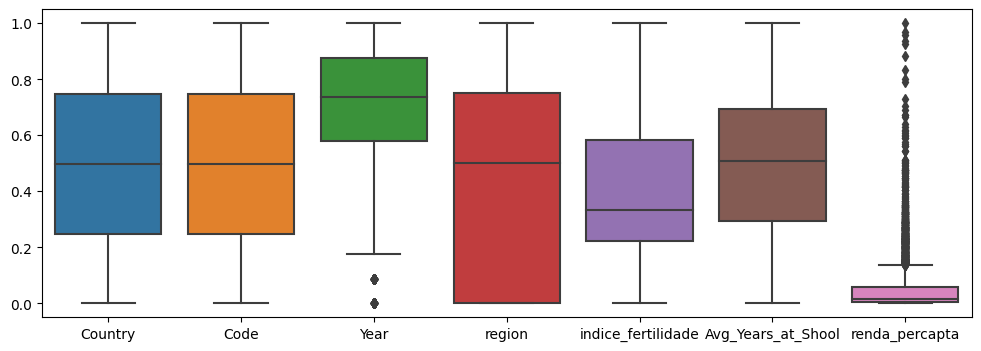

In [170]:
#plot para verificar em gráfico
#Presença de outliers na renda percapta
plt.figure(figsize=(12,4))
ax = sns.boxplot(data = dataset_norm)

In [171]:
dataset_norm['renda_percapta'].describe()

count    4995.000000
mean        0.054485
std         0.096253
min         0.000000
25%         0.004057
50%         0.014623
75%         0.056910
max         1.000000
Name: renda_percapta, dtype: float64

<Axes: >

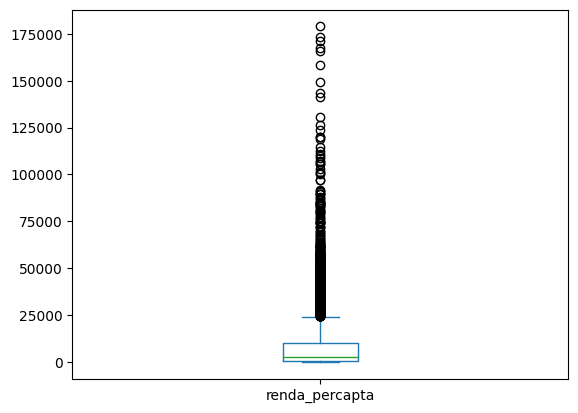

In [189]:
datasetfinal['renda_percapta'].plot.box()

<Axes: >

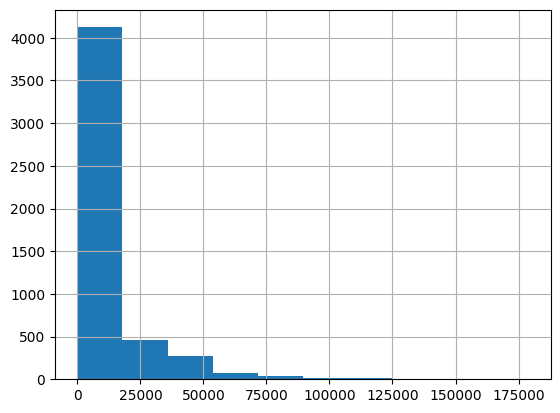

In [191]:
datasetfinal['renda_percapta'].hist()

<Axes: >

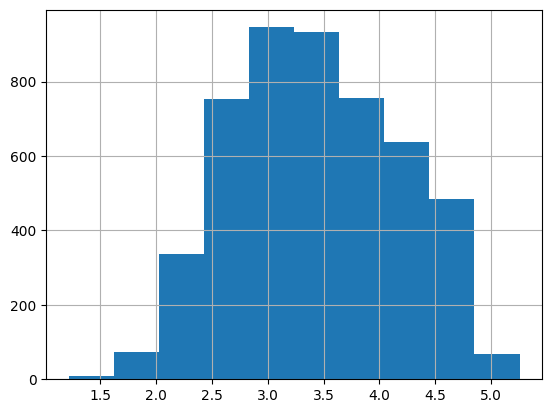

In [193]:
datasetfinal['renda_percapta_log'] = log10(datasetfinal['renda_percapta'])
datasetfinal['renda_percapta_log'].hist()

In [194]:
from numpy import abs
mad = abs(datasetfinal['renda_percapta_log'] - datasetfinal['renda_percapta_log'].median()).median()*(1/0.6745)
print(mad)

0.8396448225156742


In [196]:
datasetfinal['renda_percapta_log'].mad()

<ipython-input-196-73de6856bd54>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  datasetfinal['renda_percapta_log'].mad()


0.6199726630868255

<Axes: >

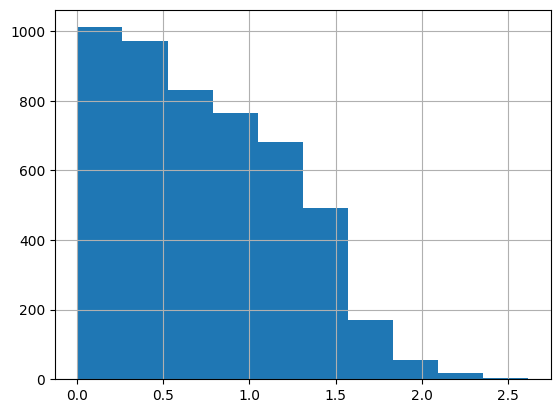

In [197]:
(abs(datasetfinal['renda_percapta_log']-datasetfinal['renda_percapta_log'].median())/mad).hist()

In [216]:
#são rendas muito baixas, mas como a informação se prolonga aos anos, é o cenário do país
datasetfinal[abs(datasetfinal['renda_percapta_log']-datasetfinal['renda_percapta_log'].median())/mad > 2.2]

,nova_chave,Country,Code,Year,region,indice_fertilidade,Avg_Years_at_Shool,renda_percapta,Range,renda_percapta_log
2137,IRQ_1991,Iraq,IRQ,1991,Asia,5.810,3.40,22.795345,2000s,1.357846
2138,IRQ_1992,Iraq,IRQ,1992,Asia,5.720,3.60,30.086387,2000s,1.478370
3048,MMR_1965,Myanmar,MMR,1965,Asia,5.994,1.08,16.596459,1970s,1.220015
3049,MMR_1970,Myanmar,MMR,1970,Asia,5.752,1.12,21.232583,1970s,1.327003
3050,MMR_1975,Myanmar,MMR,1975,Asia,5.291,1.12,36.865226,1980s,1.566617
3051,MMR_1980,Myanmar,MMR,1980,Asia,4.828,1.68,29.528620,1980s,1.470243
3052,MMR_1985,Myanmar,MMR,1985,Asia,4.297,2.26,34.516531,1990s,1.538027


In [ ]:
#Outliers com Isolation forest
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

In [225]:
datasetfinal.columns.values

array(['nova_chave', 'Country', 'Code', 'Year', 'region',
       'indice_fertilidade', 'Avg_Years_at_Shool', 'renda_percapta',
       'Range', 'renda_percapta_log'], dtype=object)

In [227]:
df_outlier = dataset_norm[['Country', 'Code', 'Year', 'region',
       'indice_fertilidade', 'Avg_Years_at_Shool', 'renda_percapta', 'Range']].copy()

In [228]:
outlier_input = ['indice_fertilidade', 'Avg_Years_at_Shool', 'renda_percapta']

In [229]:
model_IF = IsolationForest(contamination=0.1, max_features=1.0, random_state=42)
model_IF.fit(df_outlier[outlier_input])
df_outlier['outlier_score'] = model_IF.decision_function(df_outlier[outlier_input])
df_outlier['outlier'] = model_IF.predict(df_outlier[outlier_input])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [230]:
df_outlier.loc[:, ['indice_fertilidade', 'Avg_Years_at_Shool', 'renda_percapta' , 'outlier_score', 'outlier']]

,indice_fertilidade,Avg_Years_at_Shool,renda_percapta,outlier_score,outlier
0,0.884704,0.009986,0.000241,-0.065883,-1
1,0.887498,0.014979,0.000473,-0.064247,-1
2,0.899040,0.019258,0.000782,-0.065491,-1
3,0.916292,0.038516,0.000950,-0.048761,-1
4,0.921881,0.049929,0.001432,-0.047258,-1
...,...,...,...,...,...
4990,0.493743,0.564907,0.007903,0.084249,1
4991,0.481351,0.579173,0.007930,0.087555,1
4992,0.467622,0.579173,0.007987,0.089441,1
4993,0.458146,0.579173,0.008096,0.088831,1


In [231]:
def outlier_plot (data, outlier_method_name, x_var, y_var,
                  xaxis_limits=[0,1], yaxis_limits=[0,1]):
  print(f'Outlier Method: {outlier_method_name}')

  method = f' {outlier_method_name}_anomaly'

  print(f"Number of anomalous values {len(data[data['outlier']==-1])}")
  print(f"Number of non anomalous values {len(data[data['outlier']==1])}")
  print(f'Total Number of Values: {len(data)}')

  g = sns.FacetGrid(data, col='outlier', height=4, hue='outlier', hue_order=[1,-1])
  g.map(sns.scatterplot, x_var, y_var)
  g.fig.suptitle(f'Outlier Method: {Outlier_method_name}', y=1.10, fontweight='bold')
  g.set(xlim=xaxis_limits, ylim=yaxis_limits)
  axes = g.axes.flatten()
  axes[0].set_title(f"Outliers\n{len(data[data['outlier']== -1])} points")
  axes[1].set_title(f"Inliers\n{len(data[data['outlier']== 1])} points")

  return g

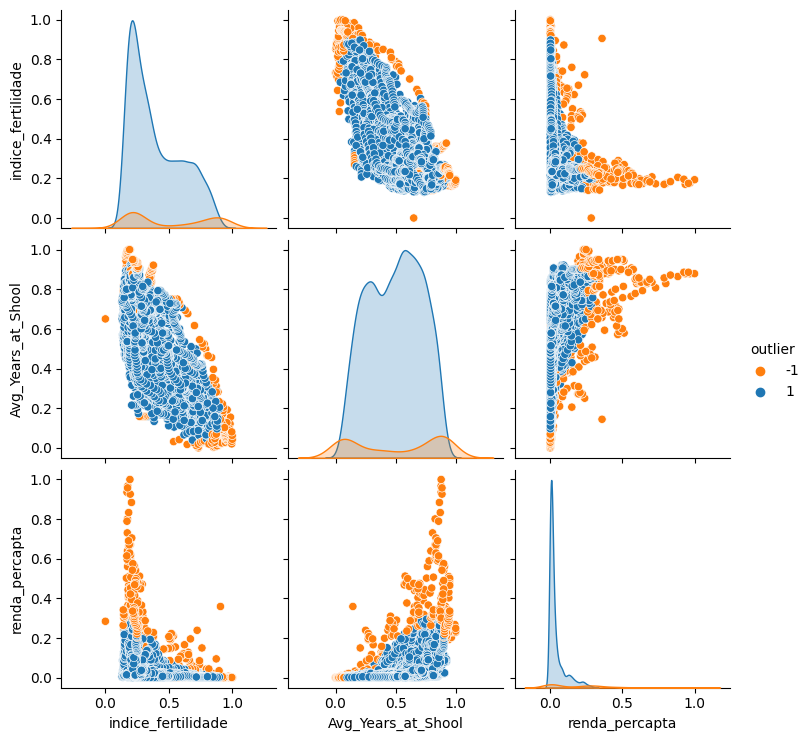

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [232]:
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df_outlier, vars=outlier_input, hue='outlier', palette=palette)

In [233]:
# Apesar de ter outliers, eles fazem parte da análise, pois estou comparando fertilidade com índices de escolaridade e percapta

# 5 Análises

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [235]:
plt.style.use('fivethirtyeight')
plt.rcParams['axes.prop_cycle'].by_key()['color']

['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c']

In [236]:
datasetfinal.shape

(4995, 10)

In [244]:
datasetfinal.dtypes

nova_chave            category
Country               category
Code                  category
Year                     int64
region                category
indice_fertilidade     float64
Avg_Years_at_Shool     float64
renda_percapta         float64
Range                 category
renda_percapta_log     float64
dtype: object

In [247]:
#Verificando as estatísticas do índice de fertilidade
datasetfinal['indice_fertilidade'].describe()

count    4995.000000
mean        3.363467
std         1.807903
min         0.000000
25%         1.820250
50%         2.744000
75%         4.782500
max         8.231000
Name: indice_fertilidade, dtype: float64

In [248]:
# A maioria das pessoas tem uma média de 2 filhos
datasetfinal['indice_fertilidade'].mode()

0    1.57
Name: indice_fertilidade, dtype: float64

In [250]:
datasetfinal['indice_fertilidade'].var()

3.268514593535325

array([[<Axes: title={'center': 'indice_fertilidade'}>]], dtype=object)

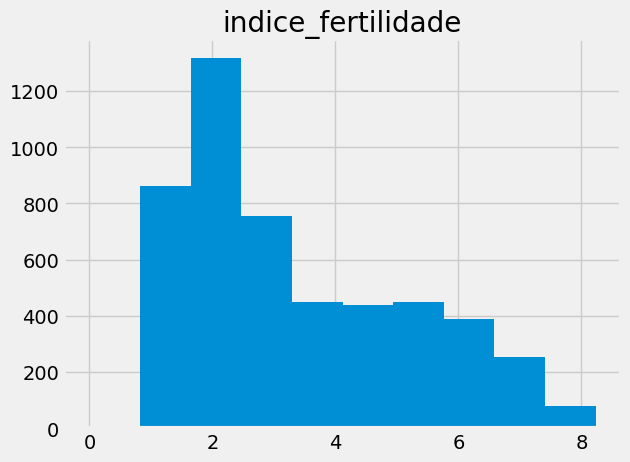

In [252]:
datasetfinal.hist(column=['indice_fertilidade'])

In [253]:
#  média do índice de fertilidade por ano
df_media = datasetfinal.groupby('Range')['indice_fertilidade'].mean()

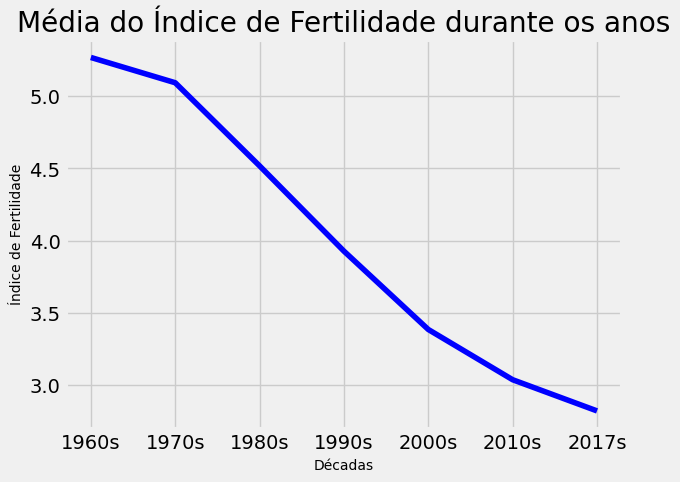

In [256]:
#gráfico
plt.plot(df_media.index, df_media.values, marker=' ', color='blue')
plt.xlabel('Décadas', fontsize=10)
plt.ylabel('Índice de Fertilidade', fontsize=10)
plt.title('Média do Índice de Fertilidade durante os anos')
plt.grid(True)
plt.show()

In [257]:
# média do índice de fertilidade para cada país
media_pais = datasetfinal.groupby('Country')['indice_fertilidade'].mean().reset_index()
media_pais

,Country,indice_fertilidade
0,Afghanistan,6.927941
1,Albania,2.552176
2,Algeria,3.786824
3,Andorra,1.247778
4,Angola,6.241263
...,...,...
161,Uzbekistan,2.433000
162,Vanuatu,4.088154
163,Vietnam,2.840118
164,Zambia,5.958412


In [258]:
#10 países com maior média de índice de fertilidade
top_mais_pais = media_pais.nlargest(10, 'indice_fertilidade')['Country'].tolist()
top_mais_pais

['Niger',
 'Somalia',
 'Chad',
 'Afghanistan',
 'Mali',
 'Burundi',
 'Uganda',
 'Angola',
 'Malawi',
 'Benin']

In [259]:
# Filtrar os dados do índice de fertilidade apenas para os 10 países selecionados
df_top_mais_pais = datasetfinal[datasetfinal['Country'].isin(top_mais_pais)]
df_top_mais_pais

,nova_chave,Country,Code,Year,region,indice_fertilidade,Avg_Years_at_Shool,renda_percapta,Range,renda_percapta_log
0,AFG_1960,Afghanistan,AFG,1960,Asia,7.282,0.22,59.773234,1960s,1.776507
1,AFG_1965,Afghanistan,AFG,1965,Asia,7.305,0.29,101.108325,1970s,2.004787
2,AFG_1970,Afghanistan,AFG,1970,Asia,7.400,0.35,156.518771,1970s,2.194566
3,AFG_1975,Afghanistan,AFG,1975,Asia,7.542,0.62,186.510838,1980s,2.270704
4,AFG_1980,Afghanistan,AFG,1980,Asia,7.588,0.78,272.655510,1980s,2.435614
...,...,...,...,...,...,...,...,...,...,...
4694,UGA_2013,Uganda,UGA,2013,Africa,5.618,5.40,810.090395,2017s,2.908533
4695,UGA_2014,Uganda,UGA,2014,Africa,5.463,5.50,883.528744,2017s,2.946221
4696,UGA_2015,Uganda,UGA,2015,Africa,5.306,5.70,847.267629,2017s,2.928021
4697,UGA_2016,Uganda,UGA,2016,Africa,5.174,5.70,736.559847,2017s,2.867208


In [264]:
#Aqui temos os países c om maior índice de fertilidade ao longo das décadas

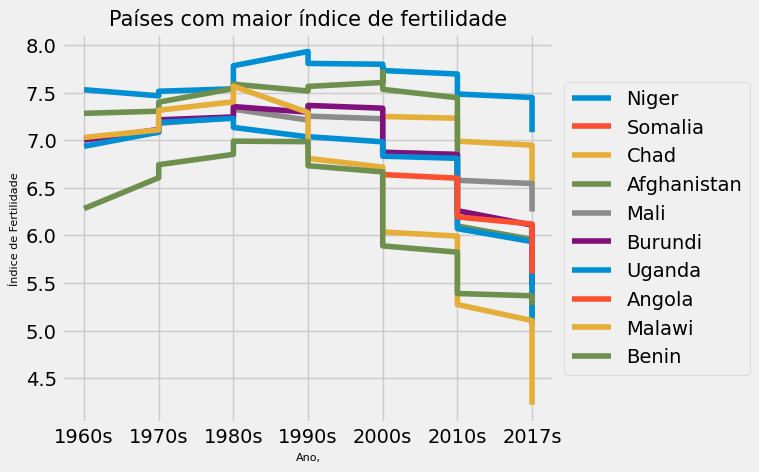

In [260]:
fig, ax = plt.subplots()

for pais in top_mais_pais:
    dados_pais_mais = df_top_mais_pais[df_top_mais_pais['Country'] == pais]
    ax.plot(dados_pais_mais['Range'], dados_pais_mais['indice_fertilidade'], label=pais)

plt.xlabel('Ano,', fontsize=8)
plt.ylabel('Índice de Fertilidade',  fontsize=8)
plt.title('Países com maior índice de fertilidade',  fontsize=15)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(right=0.85)

plt.show()

In [265]:
#Aqui temos os países com menor índice de fertilidade ao longo das décadas

In [261]:
media_pais
top_menos_pais = media_pais.nsmallest(10, 'indice_fertilidade')['Country'].tolist()
top_menos_pais

['Andorra',
 'Bosnia and Herzegovina',
 'Belarus',
 'Italy',
 'Germany',
 'Liechtenstein',
 'Greece',
 'Japan',
 'Spain',
 'Ukraine']

In [262]:
df_top_menos_pais = datasetfinal[datasetfinal['Country'].isin(top_menos_pais)]
df_top_menos_pais

,nova_chave,Country,Code,Year,region,indice_fertilidade,Avg_Years_at_Shool,renda_percapta,Range,renda_percapta_log
87,AND_2000,Andorra,AND,2000,Europe,1.240,6.7,21854.246803,2000s,4.339536
88,AND_2001,Andorra,AND,2001,Europe,1.240,7.1,22970.512213,2010s,4.361171
89,AND_2002,Andorra,AND,2002,Europe,1.240,7.6,25067.240064,2010s,4.399107
90,AND_2003,Andorra,AND,2003,Europe,1.240,10.1,32272.845891,2010s,4.508837
91,AND_2004,Andorra,AND,2004,Europe,1.240,10.5,37966.187252,2010s,4.579397
...,...,...,...,...,...,...,...,...,...,...
4728,UKR_2013,Ukraine,UKR,2013,Europe,1.506,11.3,4187.739845,2017s,3.621980
4729,UKR_2014,Ukraine,UKR,2014,Europe,1.498,11.3,3104.643206,2017s,3.492012
4730,UKR_2015,Ukraine,UKR,2015,Europe,1.506,11.3,2124.662319,2017s,3.327290
4731,UKR_2016,Ukraine,UKR,2016,Europe,1.466,11.3,2187.730510,2017s,3.339994


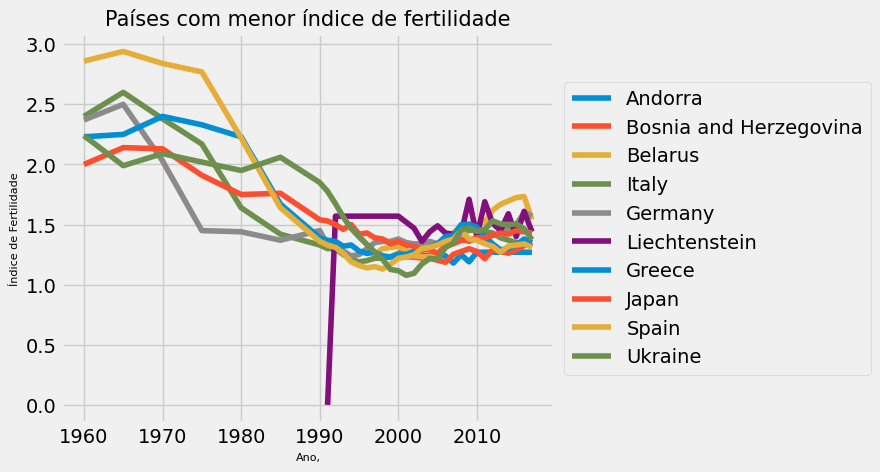

In [263]:
fig2, ax = plt.subplots()

for pais2 in top_menos_pais:
    dados_pais_menos = df_top_menos_pais[df_top_menos_pais['Country'] == pais2]
    ax.plot(dados_pais_menos['Year'], dados_pais_menos['indice_fertilidade'], label=pais2)

plt.xlabel('Ano,', fontsize=8)
plt.ylabel('Índice de Fertilidade',  fontsize=8)
plt.title('Países com menor índice de fertilidade',  fontsize=15)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(right=0.85)

plt.show()

In [267]:
#Resumindo o índice de fertilidade por região e década
df_media_cont = datasetfinal.groupby(['Range', 'region'])['indice_fertilidade'].mean().reset_index()
df_media_cont

,Range,region,indice_fertilidade
0,1960s,Africa,6.705061
1,1960s,Americas,5.804885
2,1960s,Asia,5.983433
3,1960s,Europe,2.739788
4,1960s,Oceania,5.411400
5,1970s,Africa,6.820318
6,1970s,Americas,5.323577
7,1970s,Asia,5.889833
8,1970s,Europe,2.509030
9,1970s,Oceania,4.790100


In [268]:
# Mostrando um comparativo por continente ao longo das décadas

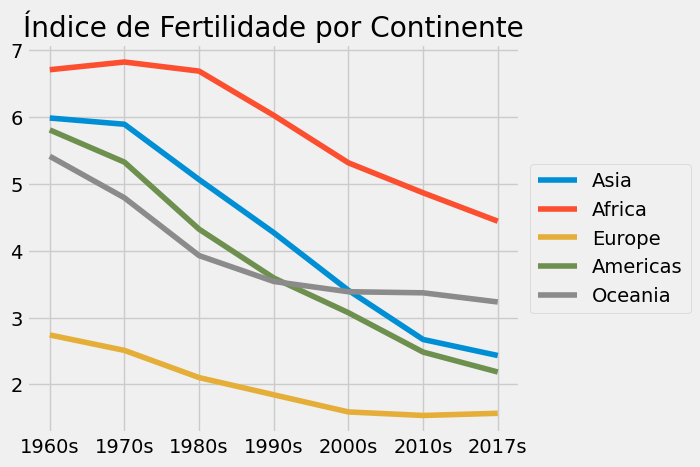

In [269]:
fig, ax = plt.subplots()

continentes = datasetfinal['region'].unique()
for continente in continentes:
    dados_continente = df_media_cont[df_media_cont['region'] == continente]
    ax.plot(dados_continente['Range'], dados_continente['indice_fertilidade'], label=continente)

plt.title('Índice de Fertilidade por Continente')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(right=0.85)

plt.show()


<ipython-input-270-7f6c0e1ab562>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ax = datasetfinal.groupby('Year')['indice_fertilidade', 'Avg_Years_at_Shool'].mean()\


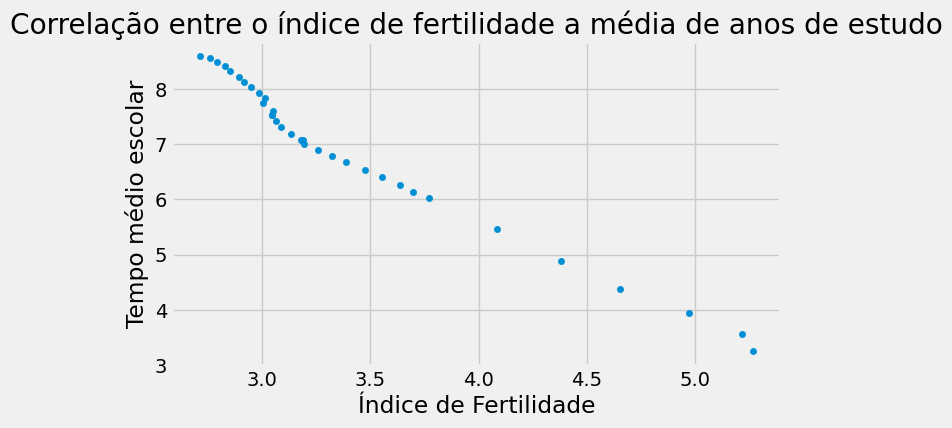

In [270]:
#Correlação entre Índice de Fertilidade e o Anos de escolaridade
ax = datasetfinal.groupby('Year')['indice_fertilidade', 'Avg_Years_at_Shool'].mean()\
.plot(kind='scatter', x='indice_fertilidade', y='Avg_Years_at_Shool',\
     title='Correlação entre o índice de fertilidade a média de anos de estudo',\
     figsize=(7,4))
ax.set_ylabel('Tempo médio escolar')
ax.set_xlabel('Índice de Fertilidade')
plt.show()

<ipython-input-271-019532f217ce>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ax = datasetfinal.groupby('Year')['indice_fertilidade', 'renda_percapta'].mean()\


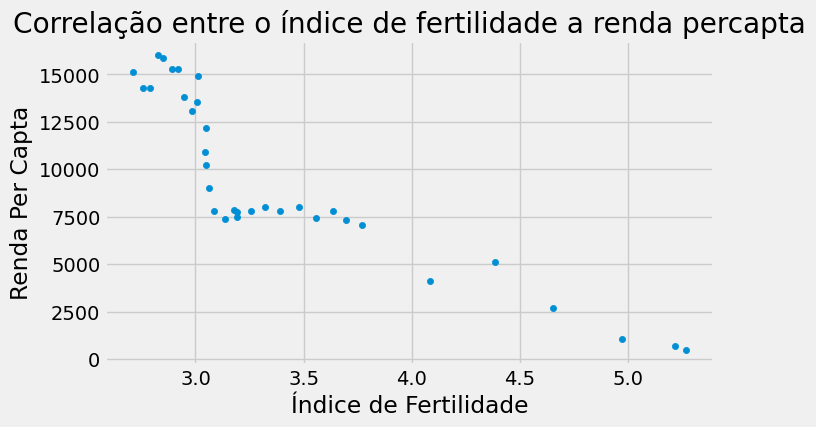

In [271]:
#Correlação entre Índice de Fertilidade e a Renda Per Capta
ax = datasetfinal.groupby('Year')['indice_fertilidade', 'renda_percapta'].mean()\
.plot(kind='scatter', x='indice_fertilidade', y='renda_percapta',\
     title='Correlação entre o índice de fertilidade a renda percapta',\
     figsize=(7,4))
ax.set_ylabel('Renda Per Capta')
ax.set_xlabel('Índice de Fertilidade')
plt.show()

<Axes: xlabel='Avg_Years_at_Shool', ylabel='renda_percapta'>

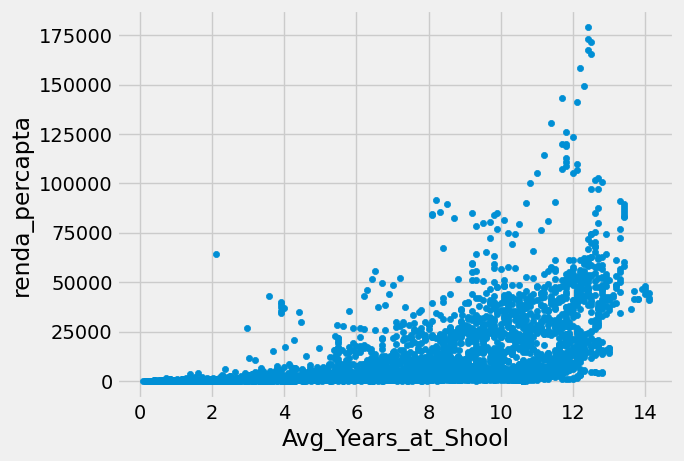

In [272]:
#mostrando que quanto maior o tempo de escolaridade, maior a renda percapta
datasetfinal.plot.scatter(x='Avg_Years_at_Shool',y='renda_percapta')

# 6 Aplicando Teste de Hipótese


In [277]:
from scipy import stats
import scipy.stats as stats

In [275]:
datasetfinal[['indice_fertilidade','Avg_Years_at_Shool']].describe()

,indice_fertilidade,Avg_Years_at_Shool
count,4995.000000,4995.000000
mean,3.363467,6.991389
std,1.807903,3.342408
min,0.000000,0.080000
25%,1.820250,4.200000
50%,2.744000,7.200000
75%,4.782500,9.800000
max,8.231000,14.100000


In [280]:
#  teste de Mann-Whitney U
statistic, p_value = stats.mannwhitneyu(datasetfinal['indice_fertilidade'], datasetfinal['Avg_Years_at_Shool'])

print("teste de Mann-Whitney U:", statistic)
print("Valor-p:", p_value)

teste de Mann-Whitney U: 4671668.0
Valor-p: 0.0


In [281]:
#rejeitamos a hipótese nula e concluímos que há evidências que existe uma diferença significativa entre tempo de escolaridade e indice de fertilidade

<Axes: >

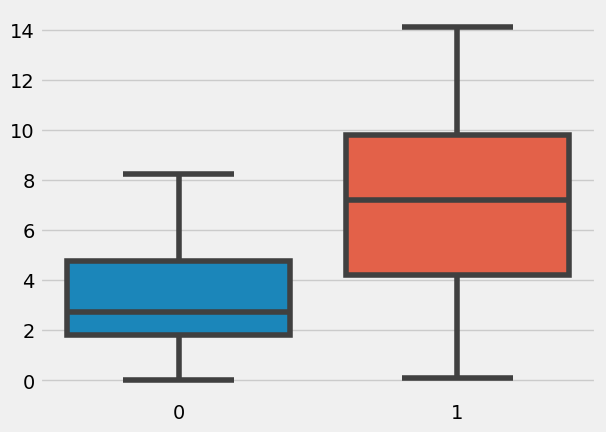

In [282]:
import seaborn as sns
data1 = datasetfinal['indice_fertilidade']
data2 = datasetfinal['Avg_Years_at_Shool']
sns.boxplot(data=[data1, data2])

In [283]:
# correlação de Pearson e realizar o teste de hipótese
correlation, p_value = stats.pearsonr(datasetfinal['indice_fertilidade'], datasetfinal['Avg_Years_at_Shool'])

alpha = 0.05  # Nível de significância

print(f"Coeficiente de correlação: {correlation}")
print(f"Valor de p: {p_value}")
if p_value < alpha:
    print("Rejeitamos a hipótese nula.")
    print("Há evidências estatísticas de que quanto maior é o tempo de estudos, menor é o nível de fertilidade.")
else:
    print("Não rejeitamos a hipótese nula.")
    print("Não há evidências estatísticas de diferença significativa entre o índice de fertilidade e o tempo de estudos.")

Coeficiente de correlação: -0.8098254862685454
Valor de p: 0.0
Rejeitamos a hipótese nula.
Há evidências estatísticas de que quanto maior é o tempo de estudos, menor é o nível de fertilidade.


# 7 Começando a parte 2 - Máquina Preditiva

In [284]:
# Variável Y da predição será o índice de fertilidade, para descobrir a tendência desse índice
#Será por Regressão
#Algorítimos escolhidos: Linear Regression,Random Forest, KNN

In [ ]:
!pip install -U scikit-learn

In [ ]:
! pip show scikit-learn  # to see which version and where scikit-learn is installed
! pip freeze  # to see all packages installed in the active virtualenv

In [ ]:
!pip3 install -U scikit-learn scipy matplotlib

In [ ]:
!pip install mlflow
import os
import warnings
import sys
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import logging
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from urllib.parse import urlparse
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

In [289]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2


if __name__ == "__main__":
    warnings.filterwarnings("ignore")
    np.random.seed(40)

    # Read the wine-quality csv file from the URL
    csv_url = (
        "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
    )
    try:
        data = pd.read_csv(csv_url, sep=";")
    except Exception as e:
        logger.exception(
            "Unable to download training & test CSV, check your internet connection. Error: %s", e
        )

In [290]:
#separando os dados de treino e teste

x= dataset_norm[['Country', 'Avg_Years_at_Shool', 'renda_percapta']]
x

,Country,Avg_Years_at_Shool,renda_percapta
0,0.0,0.009986,0.000241
1,0.0,0.014979,0.000473
2,0.0,0.019258,0.000782
3,0.0,0.038516,0.000950
4,0.0,0.049929,0.001432
...,...,...,...
4990,1.0,0.564907,0.007903
4991,1.0,0.579173,0.007930
4992,1.0,0.579173,0.007987
4993,1.0,0.579173,0.008096


In [291]:
y= dataset_norm[['indice_fertilidade']]
y

,indice_fertilidade
0,0.884704
1,0.887498
2,0.899040
3,0.916292
4,0.921881
...,...
4990,0.493743
4991,0.481351
4992,0.467622
4993,0.458146


In [292]:
[x_train, x_test, y_train, y_test]= train_test_split(x, y)

In [293]:
x_train

,Country,Avg_Years_at_Shool,renda_percapta
3743,0.721212,0.186876,0.005527
4199,0.800000,0.417261,0.000932
2262,0.448485,0.714693,0.198502
192,0.042424,0.764622,0.005108
2378,0.472727,0.636234,0.007266
...,...,...,...
3603,0.703030,0.365193,0.007559
4722,0.945455,0.793153,0.017788
3340,0.672727,0.043509,0.002354
3064,0.636364,0.222539,0.000644


In [294]:
x_test

,Country,Avg_Years_at_Shool,renda_percapta
4978,1.000000,0.472183,0.003085
2605,0.527273,0.657632,0.311872
2831,0.624242,0.350927,0.015984
4875,0.775758,0.621969,0.008529
920,0.193939,0.486448,0.011645
...,...,...,...
757,0.127273,0.643367,0.040304
3193,0.587879,0.286733,0.010487
2295,0.454545,0.664765,0.027806
4186,0.278788,0.457917,0.015890


In [295]:
y_train

,indice_fertilidade
3743,0.602843
4199,0.228283
2262,0.166444
192,0.186369
2378,0.277002
...,...
3603,0.464950
4722,0.163407
3340,0.948366
3064,0.338112


In [296]:
y_test

,indice_fertilidade
4978,0.480379
2605,0.190742
2831,0.307496
4875,0.548415
920,0.199733
...,...
757,0.360102
3193,0.600413
2295,0.198761
4186,0.274693


In [297]:
#shape dos dados
print('\nShape of training data :', x_train.shape )
print('\nShape of test data :', x_test.shape )
print('\nShape of training data :', y_train.shape )
print('\nShape of test data :', y_test.shape )


Shape of training data : (3746, 3)

Shape of training data : (1249, 3)

Shape of training data : (3746, 1)

Shape of training data : (1249, 1)


In [ ]:
!pip install mlflow
import mlflow

In [ ]:
# Algoritmo de Regressão linear

In [ ]:
fit_intercept = True  # Valor do hiperparâmetro

with mlflow.start_run():

In [327]:
  model_linear = LinearRegression(fit_intercept=fit_intercept)
  model_linear.fit(x_train,y_train)

  predicted_qualities = model_linear.predict(x_test)

  (rmse, mae, r2) = eval_metrics(y_test, predicted_qualities)

  print("  RMSE: %s" % rmse)
  print("  MAE: %s" % mae)
  print("  R2: %s" % r2)

  mlflow.log_metric("rmse", rmse)
  mlflow.log_metric("r2", r2)
  mlflow.log_metric("mae", mae)

  tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme


  RMSE: 0.13103574281753394
  MAE: 0.10667282855149395
  R2: 0.652393954409483


In [334]:
  #aplicando modelo Random Forest

  max_depth=5 #hiperparametro

  model_RFR = RandomForestRegressor(max_depth=5)
  model_RFR.fit(x_train, y_train)
  predicted_qualities = model_RFR.predict(x_test)

  (rmse, mae, r2) = eval_metrics(y_test, predicted_qualities)

  print("  RMSE: %s" % rmse)
  print("  MAE: %s" % mae)
  print("  R2: %s" % r2)

  mlflow.log_metric("rmse", rmse)
  mlflow.log_metric("r2", r2)
  mlflow.log_metric("mae", mae)

  tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

  RMSE: 0.10688604350784378
  MAE: 0.08200428427278933
  R2: 0.7687137715363993


In [345]:
from sklearn.ensemble import GradientBoostingRegressor

In [339]:
#Aplicando KGradientBoostingRegresso

In [346]:
  model_GBR = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100)
  model_GBR.fit(x_train, y_train)
  predicted_qualities =  model_GBR.predict(x_test)

  (rmse, mae, r2) = eval_metrics(y_test, predicted_qualities)

  print("  RMSE: %s" % rmse)
  print("  MAE: %s" % mae)
  print("  R2: %s" % r2)

  mlflow.log_metric("rmse", rmse)
  mlflow.log_metric("r2", r2)
  mlflow.log_metric("mae", mae)

  tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme



  RMSE: 0.08775024441952044
  MAE: 0.0661556157346553
  R2: 0.844114959257328


In [358]:
# aplicando com Support Vector Regression (SVR)
from sklearn.svm import SVR

In [359]:
  model_SVR = SVR(kernel='rbf', C=1.0)
  model_SVR.fit(x_train, y_train)
  predicted_qualities =  model_SVR.predict(x_test)

  (rmse, mae, r2) = eval_metrics(y_test, predicted_qualities)

  print("  RMSE: %s" % rmse)
  print("  MAE: %s" % mae)
  print("  R2: %s" % r2)

  mlflow.log_metric("rmse", rmse)
  mlflow.log_metric("r2", r2)
  mlflow.log_metric("mae", mae)

  tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme


  RMSE: 0.11612234774803121
  MAE: 0.09033791660451684
  R2: 0.7270146211939921


In [375]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
models_metrics = {}

In [377]:
# avaliacao do modelo
y_pred_model_linear = model_linear.predict(x_test)
r2_model_linear = r2_score(y_test, y_pred_model_linear)
mse_model_linear = mean_squared_error(y_test, y_pred_model_linear)
mape_model_linear = mean_absolute_percentage_error(y_test, y_pred_model_linear)

models_metrics['Model linear'] = {'R²': r2_model_linear , 'MSE': mse_model_linear, 'MAPE': mape_model_linear}

In [379]:
for y_pred_model_linear, metrics in models_metrics.items():
    print("Model:", y_pred_model_linear)
    print("R²:", metrics['R²'])
    print("MSE:", metrics['MSE'])
    print("MAPE:", metrics['MAPE'])
    print()

Model: Model linear
R²: 0.652393954409483
MSE: 0.0171703658957429
MAPE: 0.3265897121150291



In [383]:
y_pred_model_RFR = model_RFR.predict(x_test)
r2_model_RFR = r2_score(y_test, y_pred_model_RFR)
mse_model_RFR = mean_squared_error(y_test, y_pred_model_RFR)
mape_model_RFR = mean_absolute_percentage_error(y_test, y_pred_model_RFR)

models_metrics['Model Linear Regression'] = {'R²': r2_model_RFR , 'MSE': mse_model_RFR, 'MAPE': mape_model_RFR}

for y_pred_model_RFR, metrics in models_metrics.items():
    print("Model:", y_pred_model_RFR)
    print("R²:", metrics['R²'])
    print("MSE:", metrics['MSE'])
    print("MAPE:", metrics['MAPE'])
    print()

Model: Model linear
R²: 0.844114959257328
MSE: 0.007700105395685578
MAPE: 0.19773593452134966

Model: Model Linear Regression
R²: 0.7687137715363993
MSE: 0.011424626296760674
MAPE: 0.2422838081533883



In [384]:
y_pred_model_GBR = model_GBR.predict(x_test)
r2_model_GBR = r2_score(y_test, y_pred_model_GBR)
mse_model_GBR = mean_squared_error(y_test, y_pred_model_GBR)
mape_model_GBR = mean_absolute_percentage_error(y_test, y_pred_model_GBR)

models_metrics['Model Gradiente'] = {'R²': r2_model_GBR , 'MSE': mse_model_GBR, 'MAPE': mape_model_GBR}

for y_pred_model_GBR, metrics in models_metrics.items():
    print("Model:", y_pred_model_GBR)
    print("R²:", metrics['R²'])
    print("MSE:", metrics['MSE'])
    print("MAPE:", metrics['MAPE'])
    print()

Model: Model linear
R²: 0.844114959257328
MSE: 0.007700105395685578
MAPE: 0.19773593452134966

Model: Model Linear Regression
R²: 0.7687137715363993
MSE: 0.011424626296760674
MAPE: 0.2422838081533883

Model: Model Gradiente
R²: 0.844114959257328
MSE: 0.007700105395685578
MAPE: 0.19773593452134966



In [385]:
y_pred_model_SVR = model_SVR.predict(x_test)
r2_model_SVR= r2_score(y_test, y_pred_model_SVR)
mse_model_SVR = mean_squared_error(y_test, y_pred_model_SVR)
mape_model_SVR = mean_absolute_percentage_error(y_test, y_pred_model_SVR)

models_metrics['Model SVR'] = {'R²': r2_model_SVR , 'MSE': mse_model_SVR, 'MAPE': mape_model_SVR}

for y_pred_model_SVR, metrics in models_metrics.items():
    print("Model:", y_pred_model_SVR)
    print("R²:", metrics['R²'])
    print("MSE:", metrics['MSE'])
    print("MAPE:", metrics['MAPE'])
    print()

Model: Model linear
R²: 0.844114959257328
MSE: 0.007700105395685578
MAPE: 0.19773593452134966

Model: Model Linear Regression
R²: 0.7687137715363993
MSE: 0.011424626296760674
MAPE: 0.2422838081533883

Model: Model Gradiente
R²: 0.844114959257328
MSE: 0.007700105395685578
MAPE: 0.19773593452134966

Model: Model SVR
R²: 0.7270146211939921
MSE: 0.013484399646514688
MAPE: 0.27220866138947725



In [386]:
best_model = max(models_metrics, key=lambda x: models_metrics[x]['R²'])
print("Melhor modelo em termos de R²:", best_model)

Melhor modelo em termos de R²: Model linear


In [387]:
#previsoes de treino
predict_train = model_linear.predict(x_train)
print('\nPrevisao e tend fertilidade', predict_train)


Previsao e tend fertilidade [[0.64502385]
 [0.47508717]
 [0.24515962]
 ...
 [0.75052615]
 [0.61431411]
 [0.51934835]]


In [388]:
#previsoes de teste
predict_test = model_linear.predict(x_test)
print('\nPrevisao e tendência de fertilidade nos testes', predict_test)


Previsao e tendência de fertilidade nos testes [[0.44259505]
 [0.29656871]
 [0.51798376]
 ...
 [0.27526938]
 [0.42255989]
 [0.44734655]]


In [390]:
# Salvar o modelo treinado
mlflow.sklearn.log_model(model_linear, "Regressão linear")
